In [3]:
import numpy as np
import pandas as pd

In [4]:
CompleteSet=pd.read_csv("Placement_BeginnerTask01.csv",index_col='StudentID')
CompleteSet

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
StudentID,,,,,,,,,,,
1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed


In [5]:
CompleteSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CGPA                       10000 non-null  float64
 1   Internships                10000 non-null  int64  
 2   Projects                   10000 non-null  int64  
 3   Workshops/Certifications   10000 non-null  int64  
 4   AptitudeTestScore          10000 non-null  int64  
 5   SoftSkillsRating           10000 non-null  float64
 6   ExtracurricularActivities  10000 non-null  object 
 7   PlacementTraining          10000 non-null  object 
 8   SSC_Marks                  10000 non-null  int64  
 9   HSC_Marks                  10000 non-null  int64  
 10  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 937.5+ KB


In [6]:
CompleteSet.isna().sum()

,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0
HSC_Marks,0


In [7]:
CompleteSet['PlacementStatus'].value_counts()

,count
PlacementStatus,
NotPlaced,5803
Placed,4197


In [8]:
# checking the relations between features and final prediction
CompleteSet.groupby('PlacementStatus')['CGPA'].mean()

,CGPA
PlacementStatus,
NotPlaced,7.467672
Placed,8.016488


<Axes: title={'center': 'CGPA'}, xlabel='PlacementStatus'>

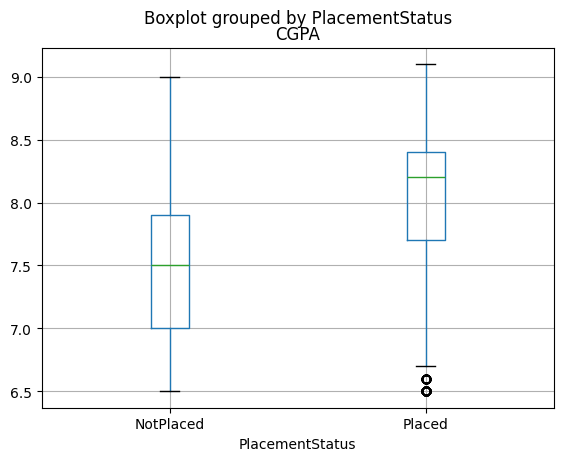

In [9]:
CompleteSet.boxplot(column='CGPA',by='PlacementStatus')

In [10]:
CompleteSet.groupby('PlacementStatus')['Internships'].mean()

,Internships
PlacementStatus,
NotPlaced,0.901775
Placed,1.253038


In [11]:
CompleteSet.groupby('PlacementStatus')['Projects'].mean()

,Projects
PlacementStatus,
NotPlaced,1.675857
Placed,2.511556


In [12]:
CompleteSet.groupby('PlacementStatus')['AptitudeTestScore'].mean()

,AptitudeTestScore
PlacementStatus,
NotPlaced,75.829399
Placed,84.455802


In [13]:
CompleteSet.groupby('PlacementStatus')['SoftSkillsRating'].mean()

,SoftSkillsRating
PlacementStatus,
NotPlaced,4.174393
Placed,4.530760


In [14]:
pd.crosstab(CompleteSet["PlacementTraining"],
            CompleteSet["PlacementStatus"],
            normalize="index") * 100

PlacementStatus,NotPlaced,Placed
PlacementTraining,,
No,84.414616,15.585384
Yes,48.360208,51.639792


In [15]:
pd.crosstab(CompleteSet["ExtracurricularActivities"],
            CompleteSet["PlacementStatus"],
            normalize="index") * 100

PlacementStatus,NotPlaced,Placed
ExtracurricularActivities,,
No,86.324168,13.675832
Yes,37.991117,62.008883


In [16]:
# the next is preprocessing of the data

In [17]:
CompleteSet['PlacementStatus']=CompleteSet['PlacementStatus'].map({
    'Placed':1,
    'NotPlaced':0
})


In [18]:
CompleteSet['PlacementTraining']=CompleteSet['PlacementTraining'].map(
    {
        'Yes':1,
        'No':0
    }
)
CompleteSet['ExtracurricularActivities']=CompleteSet['ExtracurricularActivities'].map(
    {
        'Yes':1,
        'No':0
    }
)

In [19]:
x=CompleteSet.drop('PlacementStatus',axis=1)
y=CompleteSet['PlacementStatus']

# this is for seperating the features and target

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
)

In [21]:
# normalising the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(x_train)

x_train_transform=scaler.transform(x_train)

x_test_transform=scaler.transform(x_test)


<Axes: >

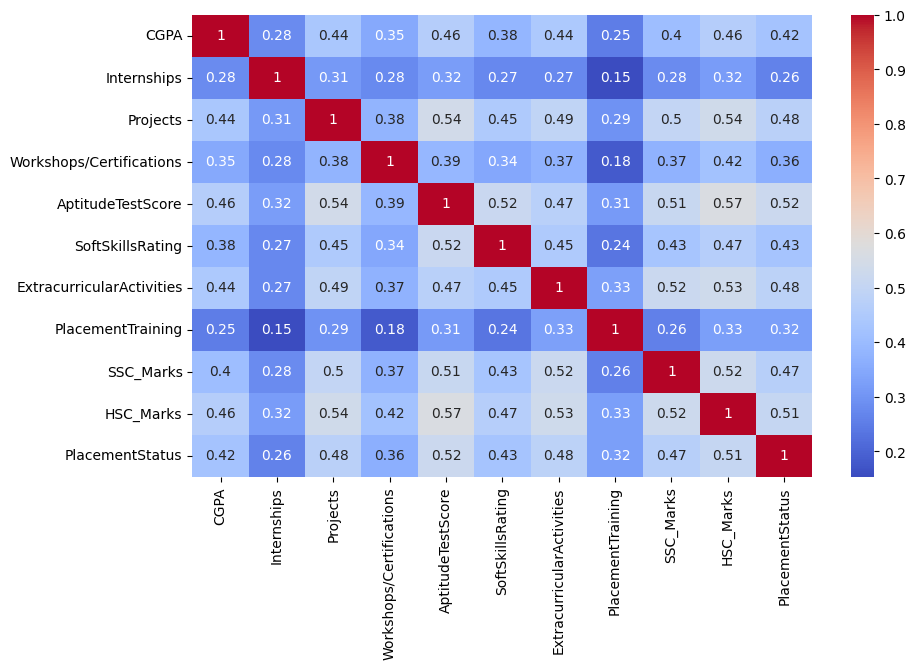

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(CompleteSet.corr(), annot=True, cmap="coolwarm")


In [23]:
# training the data
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

model.fit(x_train_transform,y_train)

LogisticRegression(max_iter=1000)

In [24]:
# testing the model
# making predictions on testing data
y_pred=model.predict(x_test_transform)

In [25]:
# checking accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8085

In [26]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[966, 195],
       [188, 651]])